## Regression Models I

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, 
                mean_squared_log_error,r2_score)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import DataPreparation as prp

## Import the data

In [5]:
data = pd.read_csv('car_price_prediction_.csv')
df = data.copy()

In [7]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


## Clean column names

### Modify the column names and make them readable.

In [8]:
df = prp.clean_columns(df, change_signs=True)
df.columns

Index(['car_id', 'brand', 'year', 'engine_size', 'fuel_type', 'transmission',
       'mileage', 'condition', 'price', 'model'],
      dtype='object')

### Drop unnecessary columns

In [9]:
df = df.drop('car_id', axis=1)

## Data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         2500 non-null   object 
 1   year          2500 non-null   int64  
 2   engine_size   2500 non-null   float64
 3   fuel_type     2500 non-null   object 
 4   transmission  2500 non-null   object 
 5   mileage       2500 non-null   int64  
 6   condition     2500 non-null   object 
 7   price         2500 non-null   float64
 8   model         2500 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 175.9+ KB


All data types are valid, therefore, no need to change any data type.

## Check missing values

In [13]:
prp.check_missing(df)

,Missing,%_of_total
brand,0,0.0
year,0,0.0
engine_size,0,0.0
fuel_type,0,0.0
transmission,0,0.0
mileage,0,0.0
condition,0,0.0
price,0,0.0
model,0,0.0


There is not any missing value.

## Distribution and outliers

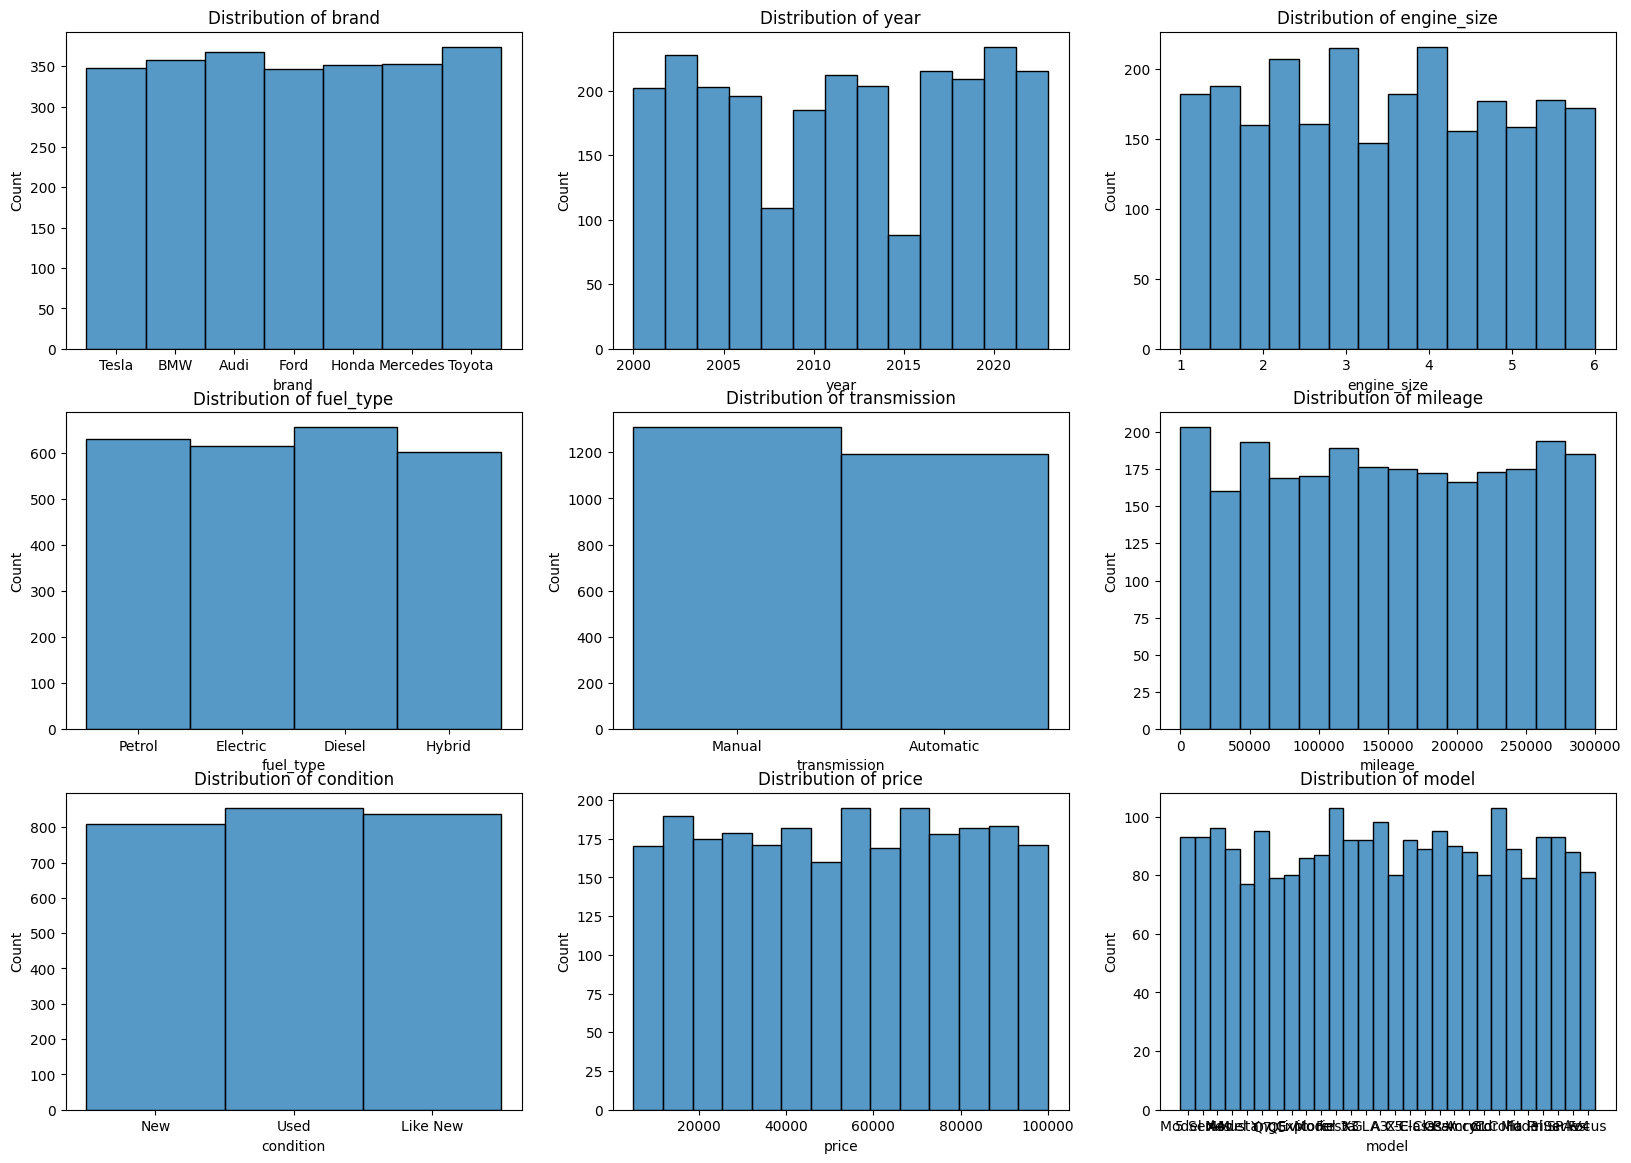

In [16]:
prp.check_distribution(df, df.columns, histogram=True, width=20, height=14)

In [18]:
numeric_cols = df.select_dtypes(include='number').columns

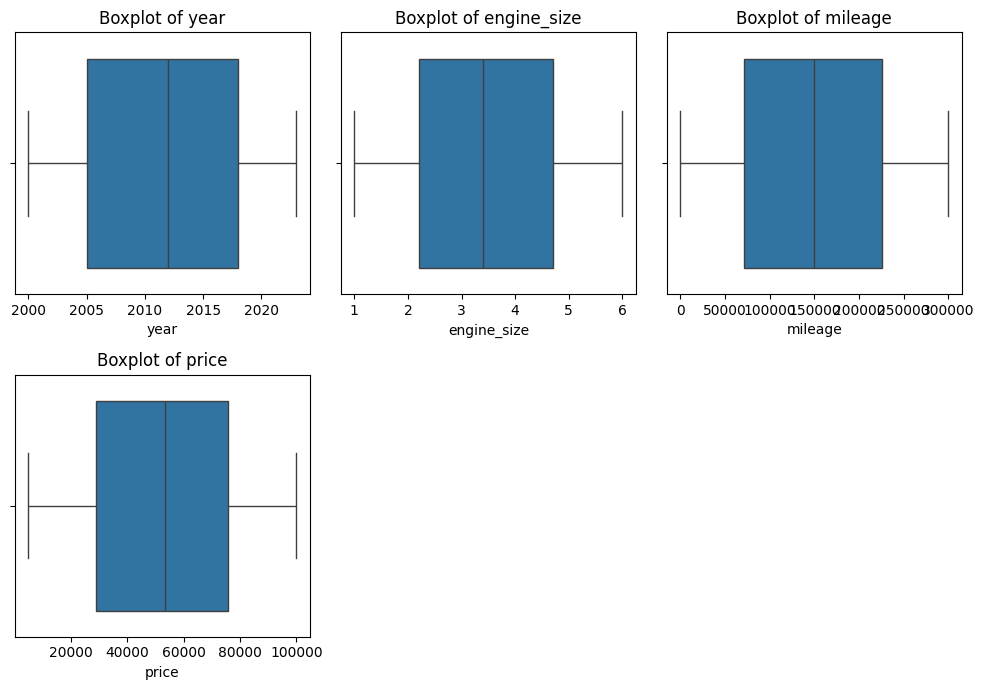

In [19]:
prp.check_outliers(df,numeric_cols, table=False, boxplot=True )

No outliers.

## Correlation

In [23]:
target = 'price'
cols = df.drop('price', axis=1).select_dtypes(include='number').columns

In [26]:
cols

Index(['year', 'engine_size', 'mileage'], dtype='object')

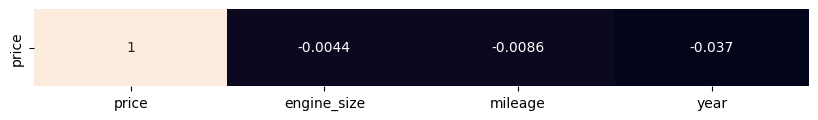

In [31]:
prp.correlation(df, columns=cols, target='price' ,visual=True, width=10, height=1)

According to the results, we can say that the numerical features do not have linear correlation with the target column. It is a crucial warning sign, because Linear Regression model requires linear correlation between the features and target. If that correlation does not exist, then model will perform poorly.

## Feature Importance

We observed that there is not correlation (linear relationship) between the numerical features and the target column. Let's analyze the caategorical columns, to see their importance in determining the target value. In order to find how much the categorical column contribute to find the numerical target value, we should apply 'Anova' test. Anova test will tell us, is there is a between the means of different groups. For example, to find how the `education` of the employee contributes to determine the his/her `salary`, anova test will, firstly, take the unique values in the education field: ['high_school', 'bachelor', 'master', 'phd']. 
Then, it will find mean salary for each education degree: ['mean_salary_highschool', 'mean_salary_bacheolor','mean_salary_master', 'mean_salary_phd'].
If there is a significant and big difference between these groups, Anova test will give large f statistics value and significant p_value (<0.05). If the means difference between the groups is not significant, then it will assign large p value (>0.05). 

In [37]:
categoric_cols = df.select_dtypes(include='object').columns

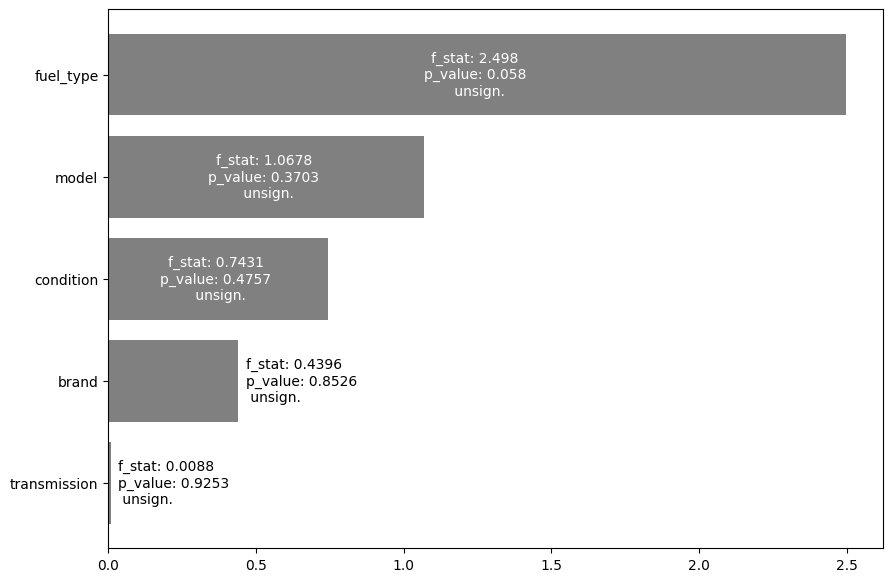

,f_stat,p_value,significance
fuel_type,2.498037,0.057961,unsign.
model,1.067794,0.370257,unsign.
condition,0.74315,0.475719,unsign.
brand,0.439647,0.852645,unsign.
transmission,0.008802,0.925261,unsign.


In [55]:
prp.feature_importance(data=df, categoric_cols = categoric_cols, numeric_target = 'price', visual = True, color='grey',annot=True)

According to the feature importance results, we can tell that the categorical feature also does not have impact on the target value. Based on the exploratory data analysis before building the model, we can confidently say that the prediction results will not be good. Because either numerical or categorical features do not have the ability to explain the data. Therefore, model will not be good for prediction. Also, we can tell that this dataset is not the real-world data. Because, in the real world data, these features should definitely affect (explain) the data. Despite of this interpretations, I will continue to build the Regression models to see how poor the model will learn and predict. 

## Scaling numerical variables

In [36]:
numeric_cols = df.select_dtypes(include='number').columns[:-1]

In [37]:
df[numeric_cols].head()

,year,engine_size,mileage
0,2016,2.3,114832
1,2018,4.4,143190
2,2013,4.5,181601
3,2011,4.1,68682
4,2009,2.6,223009


In [41]:
df = prp.scale_variables(df, method='standard', columns = numeric_cols)

In [43]:
df.head()

,brand,year,engine_size,fuel_type,transmission,mileage,condition,price,model,year_scaled,engine_size_scaled,mileage_scaled
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X,0.625610,-0.813848,-0.397234
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series,0.911720,0.652872,-0.074626
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4,0.196444,0.722716,0.362347
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y,-0.089667,0.443340,-0.922249
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang,-0.375778,-0.604316,0.833415


## Encode categorical variables

In [44]:
df['brand'].unique()

array(['Tesla', 'BMW', 'Audi', 'Ford', 'Honda', 'Mercedes', 'Toyota'],
      dtype=object)

This column has managable amount of unique values. So, we will apply dummy encoding to this column.

In [45]:
df['fuel_type'].unique()

array(['Petrol', 'Electric', 'Diesel', 'Hybrid'], dtype=object)

In [46]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [47]:
df['condition'].unique()

array(['New', 'Used', 'Like New'], dtype=object)

In [48]:
df['model'].unique()

array(['Model X', '5 Series', 'A4', 'Model Y', 'Mustang', 'Q7', 'Q5',
       'Civic', 'Explorer', 'Model 3', 'Fiesta', 'X3', 'GLA', 'A3', 'X5',
       'C-Class', 'E-Class', 'CR-V', 'Camry', 'Accord', 'GLC', 'Corolla',
       'Fit', 'Model S', 'Prius', '3 Series', 'RAV4', 'Focus'],
      dtype=object)

The number of unique values in the model column is too much. Therefore, drop it.

In [49]:
df = df.drop('model', axis=1)

In [51]:
cols = ['brand','fuel_type','transmission','condition']

In [52]:
df = prp.encode_variables(df, cols, method='onehotencoder')

In [54]:
df.head()

,brand,year,engine_size,fuel_type,transmission,mileage,condition,price,year_scaled,engine_size_scaled,mileage_scaled,brand_Audi,brand_BMW,brand_Ford,brand_Honda,brand_Mercedes,brand_Tesla,brand_Toyota,fuel_type_Diesel,fuel_type_Electric,fuel_type_Hybrid,fuel_type_Petrol,transmission_Automatic,transmission_Manual,condition_Like New,condition_New,condition_Used
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,0.625610,-0.813848,-0.397234,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,0.911720,0.652872,-0.074626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,0.196444,0.722716,0.362347,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,-0.089667,0.443340,-0.922249,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,-0.375778,-0.604316,0.833415,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


Drop the unnecessary categorical columns now

In [55]:
df = df.drop(['brand','year','engine_size','fuel_type','transmission','mileage','condition'], axis=1)

In [57]:
df.head()

,price,year_scaled,engine_size_scaled,mileage_scaled,brand_Audi,brand_BMW,brand_Ford,brand_Honda,brand_Mercedes,brand_Tesla,brand_Toyota,fuel_type_Diesel,fuel_type_Electric,fuel_type_Hybrid,fuel_type_Petrol,transmission_Automatic,transmission_Manual,condition_Like New,condition_New,condition_Used
0,26613.92,0.625610,-0.813848,-0.397234,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,14679.61,0.911720,0.652872,-0.074626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,44402.61,0.196444,0.722716,0.362347,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,86374.33,-0.089667,0.443340,-0.922249,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,73577.10,-0.375778,-0.604316,0.833415,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Train-test sets

In [58]:
X = df.drop('price', axis=1)
y = df['price']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

In [74]:
results = {'true_values': np.array(y_test)}

In [69]:
metrics = {}

## Linear Regression model

In [64]:
linreg = LinearRegression()

In [67]:
linreg = linreg.fit(X_train, y_train)

In [68]:
y_pred = linreg.predict(X_test)

In [76]:
results['linreg_values'] = y_pred

In [80]:
# metrics 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [82]:
metrics['lin_reg'] =  [rmse, mae, mape, msle, r2]

In [83]:
metrics_df = pd.DataFrame(metrics, index = ['rmse', 'mae', 'mape', 'msle', 'r2'])
metrics_df

,lin_reg
rmse,27576.310652
mae,23753.685396
mape,0.935026
msle,0.540411
r2,-0.003828


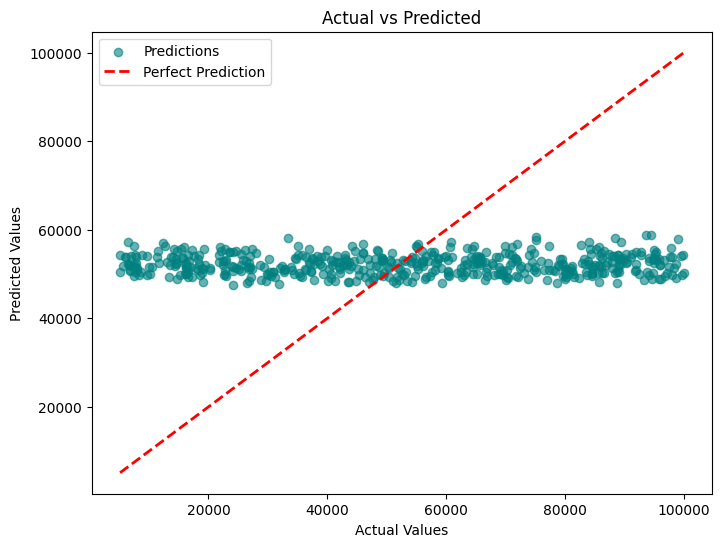

In [84]:
import matplotlib.pyplot as plt

# y_test = actual target values
# y_pred = predicted values from your model

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal', label='Predictions')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


## Random Forest model

In [92]:
randfor = RandomForestRegressor()

In [93]:
randfor = randfor.fit(X_train, y_train)

In [94]:
y_pred = randfor.predict(X_test)

In [96]:
results['randfor_values'] = y_pred

In [97]:
# metrics 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [98]:
metrics_df['rand_for'] = [rmse, mae, mape, msle, r2]

In [99]:
metrics_df

,lin_reg,rand_for
rmse,27576.310652,28283.008943
mae,23753.685396,24171.850625
mape,0.935026,0.944503
msle,0.540411,0.554462
r2,-0.003828,-0.055937


## Conclusion

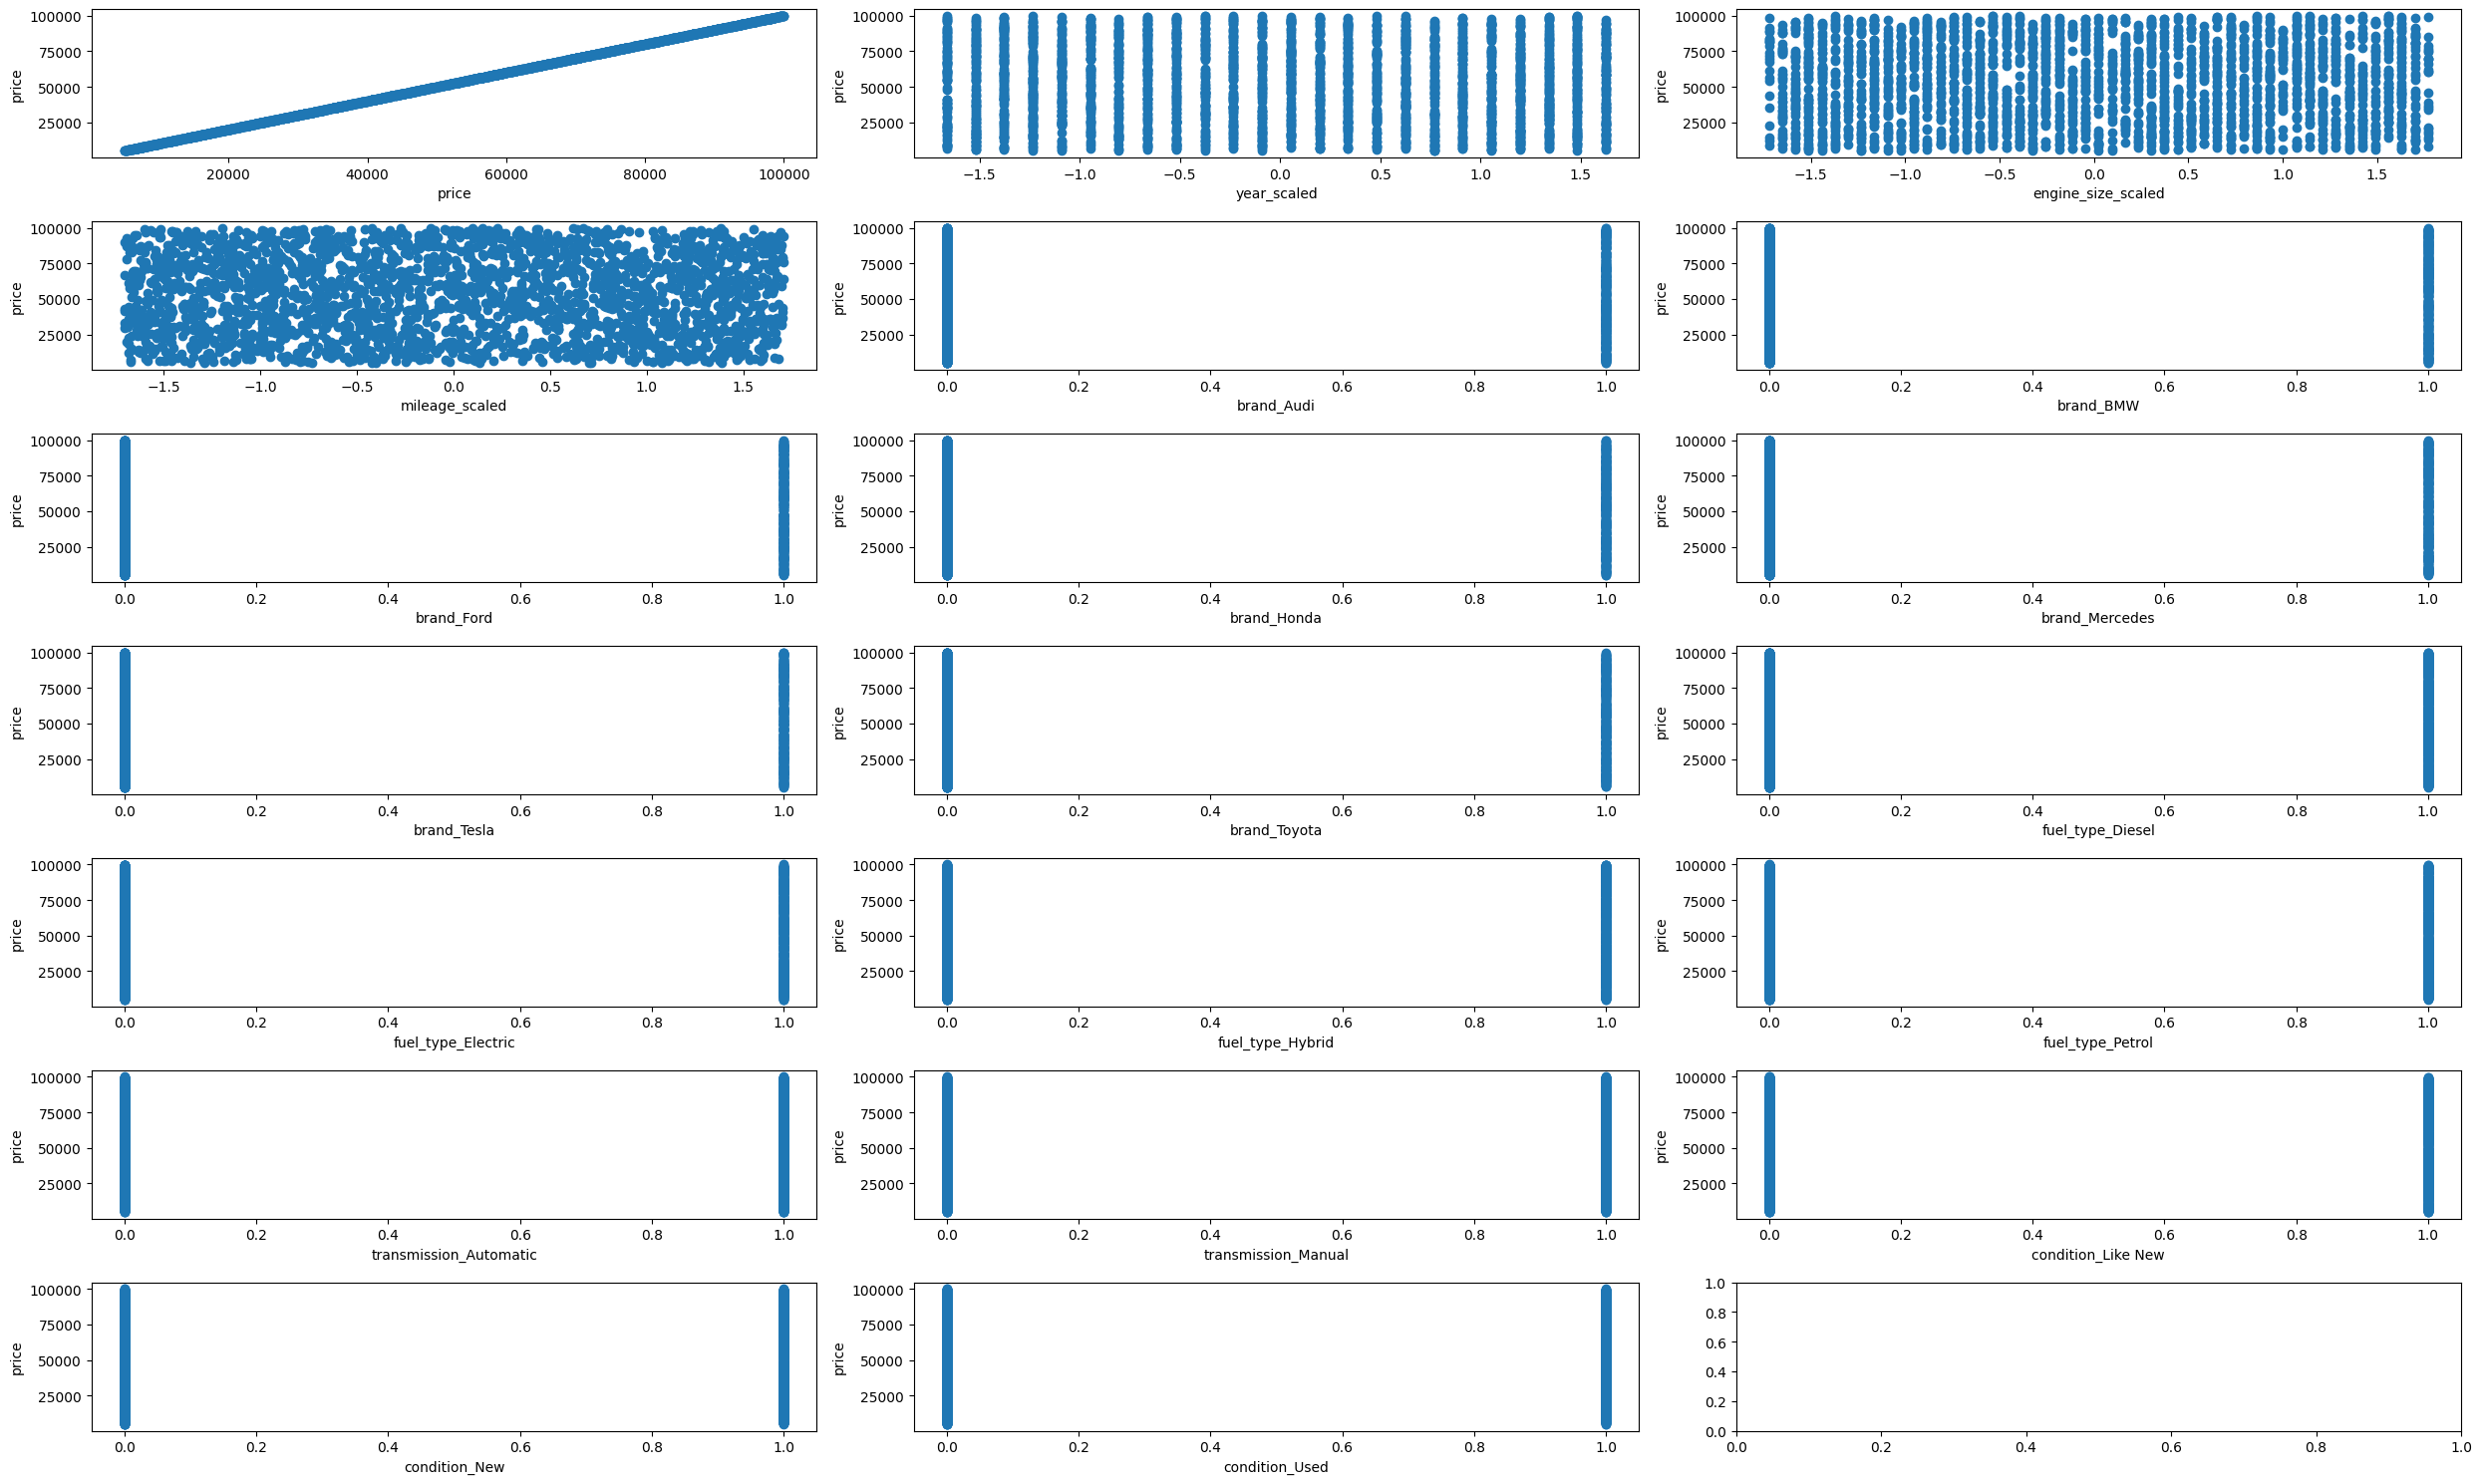

In [91]:
ncols = 3
nrows = math.ceil(len(df.columns)/3)

fig, axes = plt.subplots(nrows, ncols, figsize=(25,15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].scatter(df[col], df['price'])
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('price')

plt.tight_layout()
plt.show()

The scatter plot above shows the relationships between the features and the price. We can see again there is not any relationship or correlation between the features and the target value. Hence, our model is worse than predicting the mean for the prediction. It did not learn anything. I applied RandomForest to catch the non-linear relationships if any, but again there is not either a linear or non-linear relationship. Therefore, we got negative r2 score, meaning that the model can not explain any variability in the data.
My conclusion is that, this data is not valid for modelling. It is not real-world dataset. 